In [10]:
from model import unet
import torch
netG = unet.ResNetUNet(6)

Sequential(
  (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): Sequential(
    (0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): ReLU(inplace=True)
  )
)


In [11]:
netG.load_state_dict(torch.load('generator_model.torch', map_location=torch.device('cpu')))

<All keys matched successfully>

0 torch.Size([16, 1, 256, 256]) torch.Size([16, 1, 256, 256])
1 torch.Size([16, 1, 256, 256]) torch.Size([16, 1, 256, 256])
2 torch.Size([16, 1, 256, 256]) torch.Size([16, 1, 256, 256])
3 torch.Size([16, 1, 256, 256]) torch.Size([16, 1, 256, 256])


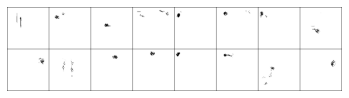

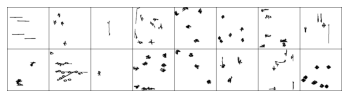

In [12]:
import image_loader as il
import matplotlib.pyplot as plt
from torchvision import transforms, utils
def show_landmarks_batch(sample_batched, withnetG=True):
    """Show image with landmarks for a batch of samples."""
    images_batch, cropped_batch = \
          sample_batched['image'], sample_batched['random_crop_image'].float()
    batch_size = len(cropped_batch)
    im_size = cropped_batch.size(2)
    grid_border_size = 2
    
    grid = utils.make_grid(cropped_batch)
    if withnetG:
        grid = utils.make_grid(netG(cropped_batch).detach())
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

dataloader = il.get_image_dataset('./data/processed_images/')
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['random_crop_image'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched, withnetG=True)
        plt.axis('off')
        plt.ioff()
        plt.savefig('output.png')
        
        plt.figure()
        show_landmarks_batch(sample_batched, withnetG=False)
        plt.axis('off')
        plt.ioff()
        plt.savefig('input.png')
        break